# Семинар 3
## Задача регрессии

### Темы на занятие:
1. Постановка задачи обучения с учителем
2. Метрики качества
3. Функции ошибки
4. Алгоритм kNN
5. Линейная регрессия "на пальцах"

Источники:
1. https://vas3k.ru/blog/machine_learning/

#### Импортирование библиотек и загрузка датасета

In [ ]:
import pandas as pd

In [ ]:
# Будем использовать набор данных Automobile Data Set (https://archive.ics.uci.edu/ml/datasets/Automobile).
# В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [ ]:
columns = ["symboling",
 "normalized-losses",
 "make",
 "fuel-type",
 "aspiration",
 "num-of-doors",
 "body-style",
 "drive-wheels",
 "engine-location",
 "wheel-base",
 "length",
 "width",
 "height",
 "curb-weight",
 "engine-type",
 "num-of-cylinders",
 "engine-size",
 "fuel-system",
 "bore",
 "stroke",
 "compression-ratio",
 "horsepower",
 "peak-rpm",
 "city-mpg",
 "highway-mpg",
 "price"]

In [ ]:
# Загрузим данные при помощи read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
# Помним о аргументах header и names

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                 header=None,
                 names=columns)

In [ ]:
# Посмотрим, что все загрузилось верно выведя первые строчки датасета

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.shape

(205, 26)

#### Постановка задачи

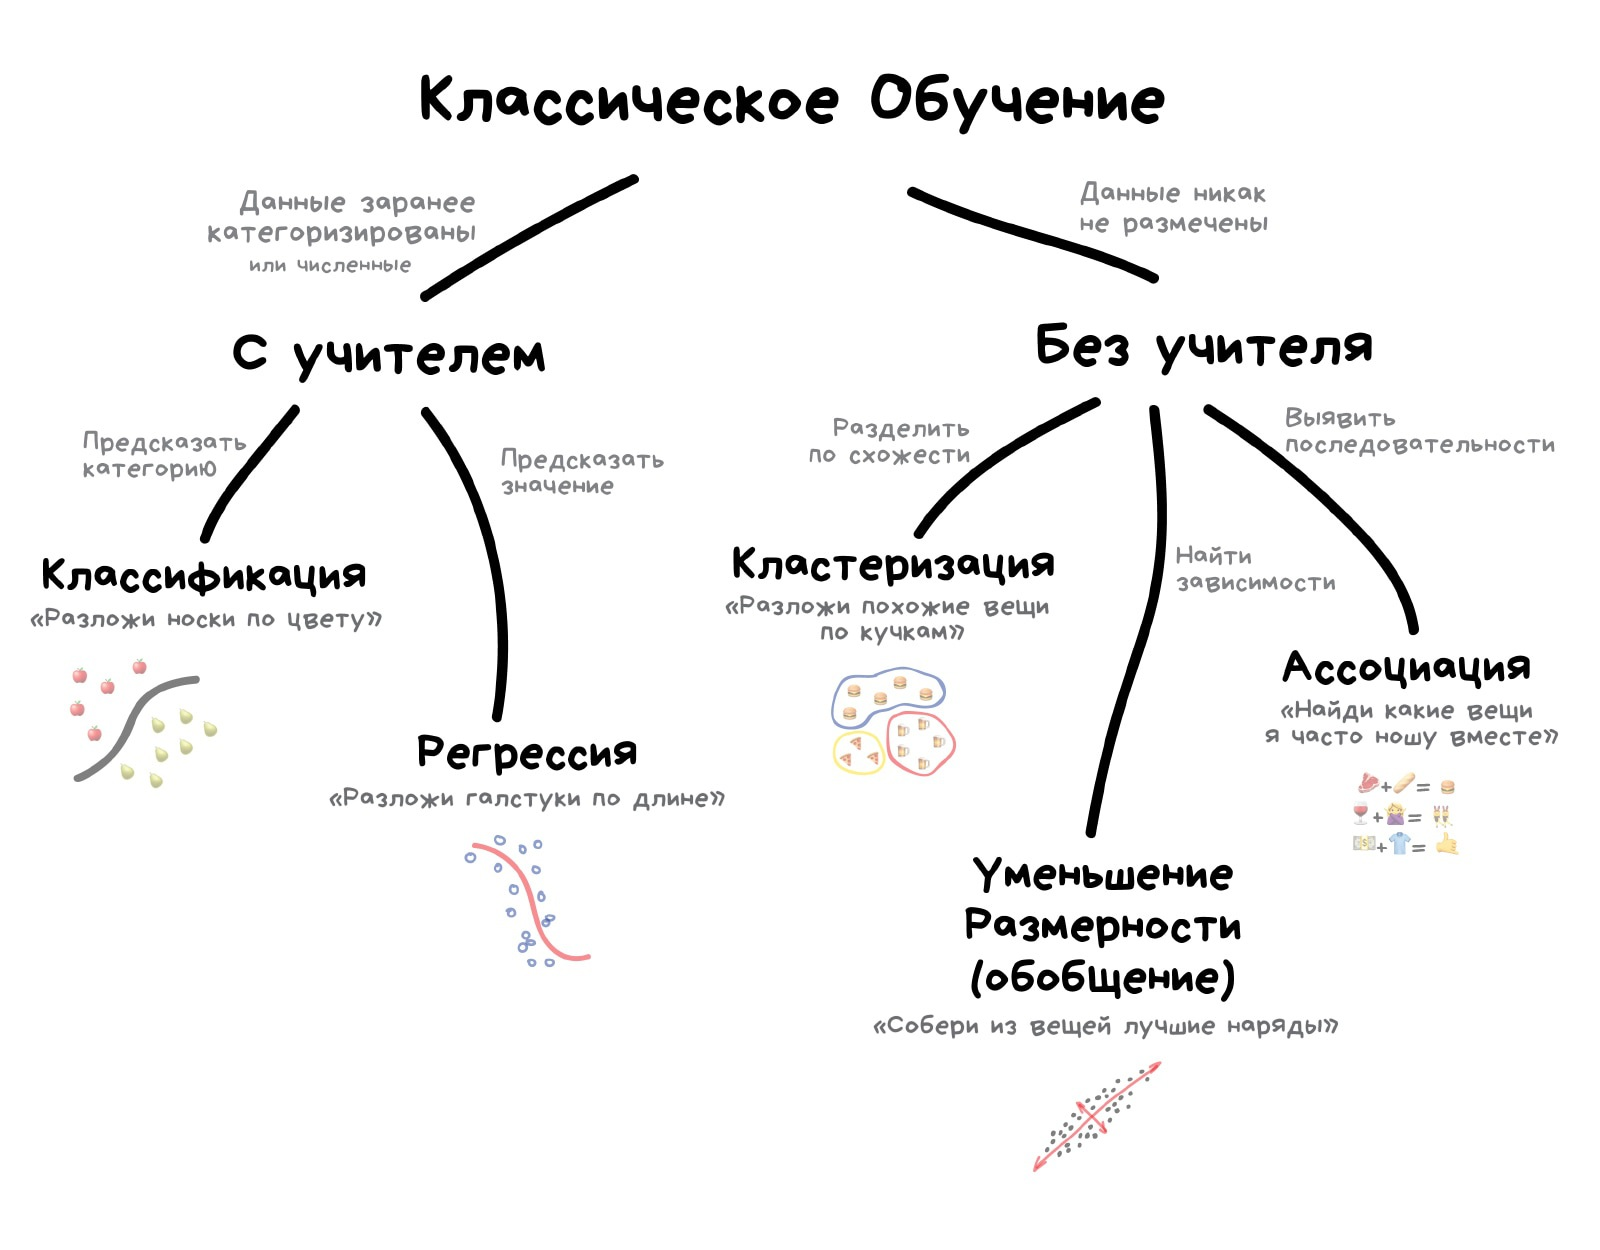

«Нарисуй линию вдоль моих точек. Да, это машинное обучение»

Сегодня используют для:

1. Прогноз стоимости ценных бумаг
2. Анализ спроса, объема продаж
3. Медицинские диагнозы
4. Любые зависимости числа от времени
5. Многих других задач

#### Есть следующий способ различать данные

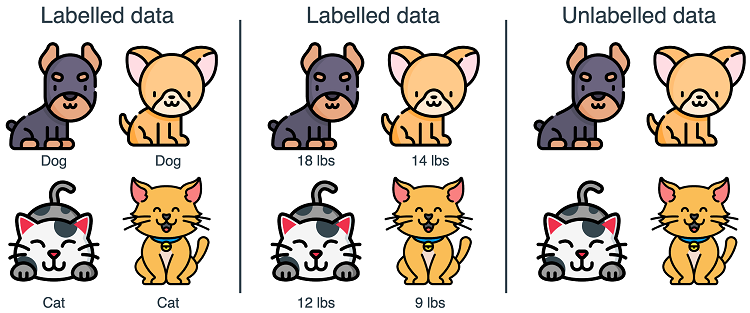

In [ ]:
# Посмотрим на наш датасет. Какая у нас задача?

...

Ellipsis

### Посмотрим на наши данные, найдем пропуски закодируем признаки

In [ ]:
# Посчитаем сколько пропусков в наших данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Почему так мало?
# Давайте еще раз посмотрим на датасет

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Видим, что пропуски в данных помечаются "?". Давайте посчитаем сколько таких знаков

df[df == '?'].count()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
for column in df.columns:
  print(df[column].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

In [ ]:
# Заменим "?" на None при помощи метода replace

df = df.replace({'?': None})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Давайте найдем признаки, в которых меньше 10 уникальных значений
# Какие из них являются категориальными?

df.nunique()[df.nunique() < 10]

symboling           6
fuel-type           2
aspiration          2
num-of-doors        2
body-style          5
drive-wheels        3
engine-location     2
engine-type         7
num-of-cylinders    7
fuel-system         8
dtype: int64

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
# Давайте внимательно посмотрим на столбец "make". Что он из себя представляет?

df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [ ]:
# Удалим пока столбец make

# df = df.drop(columns='make')

In [ ]:
make_unique = sorted(df['make'].unique())
make_to_label = {make_unique[i] : i for i in range(len(make_unique))}

In [ ]:
df = df.replace(make_to_label)

In [ ]:
# Пока что удалим все пропуски (Если будем заниматься улучшением моделей, то стоит вернуться к этому этапу)

# df = df.dropna()

In [ ]:
df.shape

(205, 26)

In [ ]:
# Закодируем OHE категориальные признаки. Для этого воспользуемся функцией get_dummies библиотеки pandas
cat_features = ['engine-type', 'drive-wheels', 'body-style', 'fuel-system']

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
# Посмотрим какого типа у нас в итоге колонки. Например при помощи метода .select_dtypes(object)

df.dtypes

symboling                 int64
normalized-losses        object
make                      int64
fuel-type                object
aspiration               object
num-of-doors             object
engine-location          object
wheel-base              float64
length                  float64
width                   float64
height                  float64
curb-weight               int64
num-of-cylinders         object
engine-size               int64
bore                     object
stroke                   object
compression-ratio       float64
horsepower               object
peak-rpm                 object
city-mpg                  int64
highway-mpg               int64
price                    object
engine-type_dohcv         uint8
engine-type_l             uint8
engine-type_ohc           uint8
engine-type_ohcf          uint8
engine-type_ohcv          uint8
engine-type_rotor         uint8
drive-wheels_fwd          uint8
drive-wheels_rwd          uint8
body-style_hardtop        uint8
body-sty

In [ ]:
# Те столбцы, которые можно явно перевести в цифры (например если в столбцах цифры написаны буквами), переведем при помощи .replace
# Какие это столбцы?

str_num_cols = df.dtypes[df.dtypes == 'object'].index
df[str_num_cols] = df[str_num_cols].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12,
                                             'front': 0, 'rear': 1, 'std': 0, 'turbo': 1, 'diesel': 0, 'gas': 1})

In [ ]:
# Поскольку модели работать с типом данных object не могут, конвертируем все столбцы в тип float

df = df.astype(float)

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,115.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,115.0,0.0,1.0,0.0,2.0,0.0,94.5,171.2,65.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,1.0,1.0,0.0,4.0,0.0,99.8,176.6,66.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.0,1.0,1.0,0.0,4.0,0.0,99.4,176.6,66.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Разобьем датасет на признаки и таргет
X = df.drop(columns='price')
y = df['price']

# Разделим данные на обучение и тест, воспользовавшись функцией train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [ ]:
X_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
66,0.0,115.0,8.0,0.0,0.0,4.0,0.0,104.9,175.0,66.1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
111,0.0,161.0,13.0,1.0,0.0,4.0,0.0,107.9,186.7,68.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153,0.0,77.0,19.0,1.0,0.0,4.0,0.0,95.7,169.7,63.6,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.0,122.0,12.0,1.0,0.0,4.0,0.0,94.5,165.3,63.8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,106.0,5.0,1.0,0.0,2.0,0.0,96.5,167.5,65.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,231.0,12.0,1.0,0.0,2.0,0.0,99.2,178.5,67.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,1.0,115.0,2.0,1.0,0.0,4.0,0.0,103.5,189.0,66.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92,1.0,122.0,12.0,1.0,0.0,4.0,0.0,94.5,165.3,63.8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179,3.0,197.0,19.0,1.0,0.0,2.0,0.0,102.9,183.5,67.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
15,0.0,115.0,2.0,1.0,0.0,4.0,0.0,103.5,189.0,66.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,115.0,1.0,1.0,1.0,2.0,0.0,99.5,178.2,67.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,0.0,106.0,12.0,1.0,0.0,4.0,0.0,97.2,173.4,65.2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,3.0,150.0,17.0,1.0,0.0,2.0,0.0,99.1,186.6,66.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,-1.0,93.0,9.0,0.0,1.0,4.0,0.0,110.0,190.9,70.3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
95,1.0,128.0,12.0,1.0,0.0,2.0,0.0,94.5,165.6,63.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.0,91.0,19.0,0.0,0.0,4.0,0.0,95.7,166.3,64.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162,0.0,91.0,19.0,1.0,0.0,4.0,0.0,95.7,166.3,64.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,89.0,18.0,1.0,0.0,4.0,0.0,97.0,173.5,65.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
182,2.0,122.0,20.0,0.0,0.0,2.0,0.0,97.3,171.7,65.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Поговорим о алгоритме kNN

`k Nearest Neighbor` является одним из самых простых алгоритмов машинного обучения и, хоть он зачастую не может хорошо решить поставленную задачу машинного обучения, его используют как подготовительный фильтр для объектов, которые будут проверятся более сложными моделями.

Еще одним преимуществом данного алгоритма является его **интерпретируемость**. То есть мы можем проанализировать почему наша модель приняла то или иное решение.

Однако алгоритм имеет ряд ограничений для данных, о которых мы поговорим в постановке.

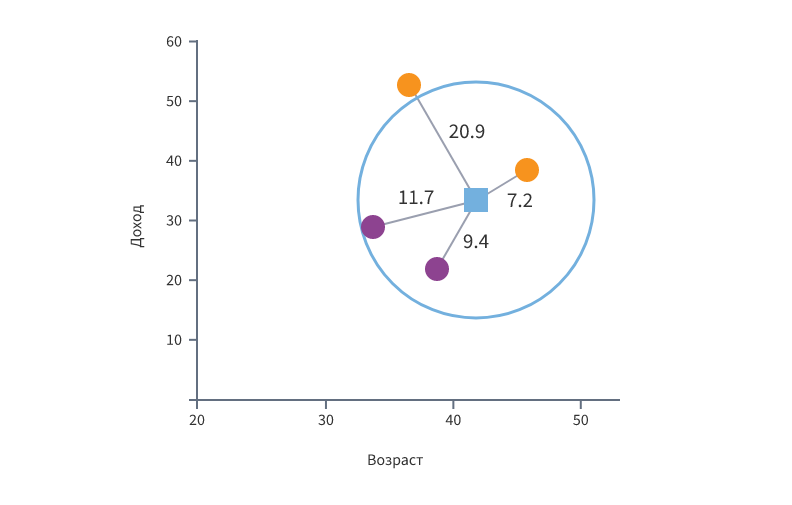

##### Постановка задачи и построение решения

У нас есть данные, которые записаны в виде матрицы размера $M\times N$, где $M$ число объектов, а $N$ -- число признаков.

Введем вспомогательное понятие -- **метрическое пространство**. Это такое пространство на котором задано расстояние между точками (расстояние измеряется метрикой). Самый простой пример -- это карта, например, в Яндекс.Карты.

*Как на картах посчитать расстояние между начальной точкой маршрута и конечной точкой маршрута? А как это сделать в нашем с вами трехмерном пространстве?*

$$\rho(x, y) = \sqrt{\sum_i (x_i - y_i)^2}$$

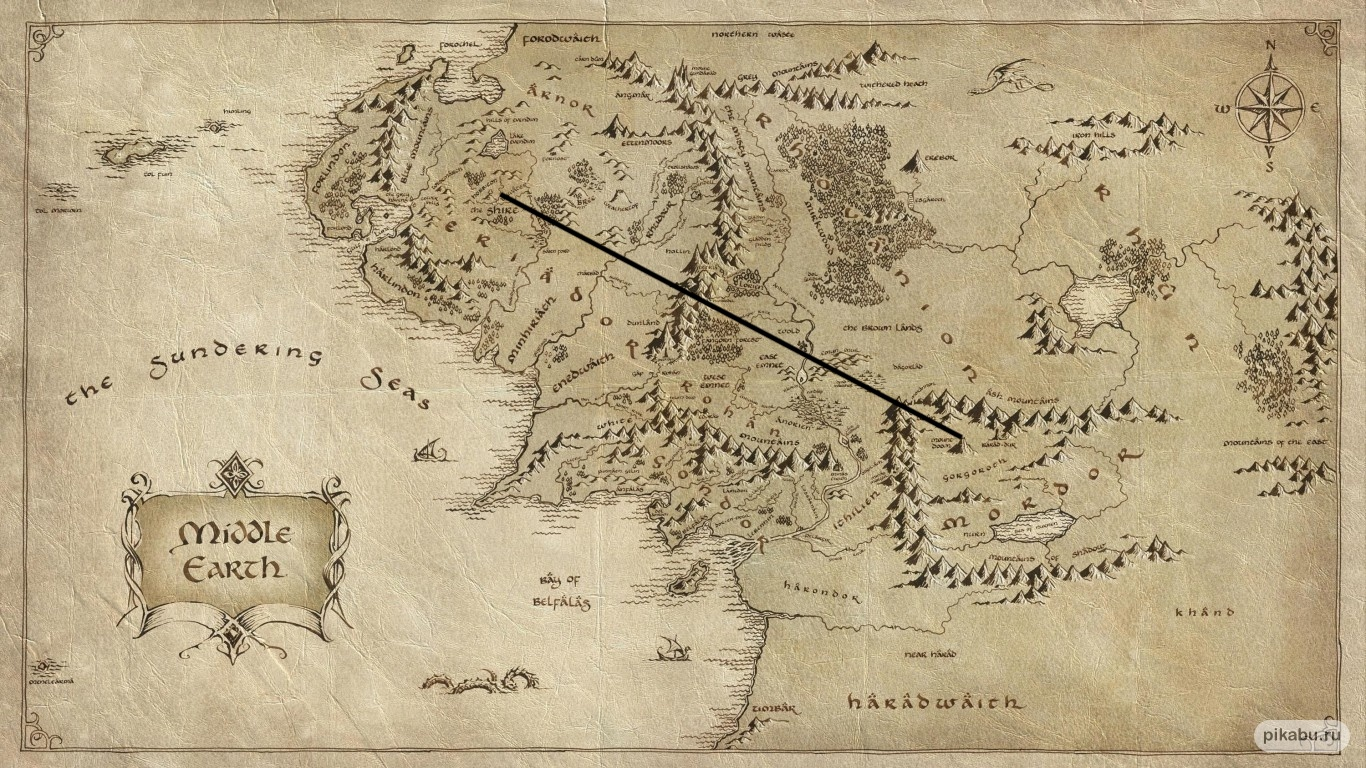

Следаем предположение, что все $N$ признаков находятся в одном (часто однородном) метрическом пространстве. Если это так, то каждый из $M$ объектов является просто точкой в $N$-мерном метрическом пространстве, а это значит, что мы можем посчитать расстояние между любыми двумя точками.

Тогда если мы выберем какую-нибудь точку, то мы сможем сказать как из $M-1$ оставшихся точек будет являтся самой ближайшей к рассматриваемой -- такую точку назовем ближайшим соседом. Аналогично можно определить второго по близости соседа и т.д.

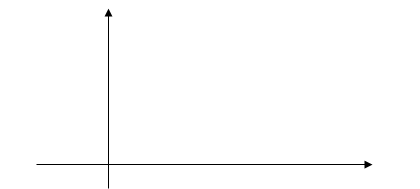



Теперь поскольку мы приняли, что наше пространство метрическое и однородное, мы можем утверждать, что точки, расстояние между которыми небольшое, будут похожи между собой, а те, у которых расстояние будет большим, будут являться непохожими.

Давайте посмотрим, что нам дает такое предположение на примере цены квартиры в зависимости от площади:

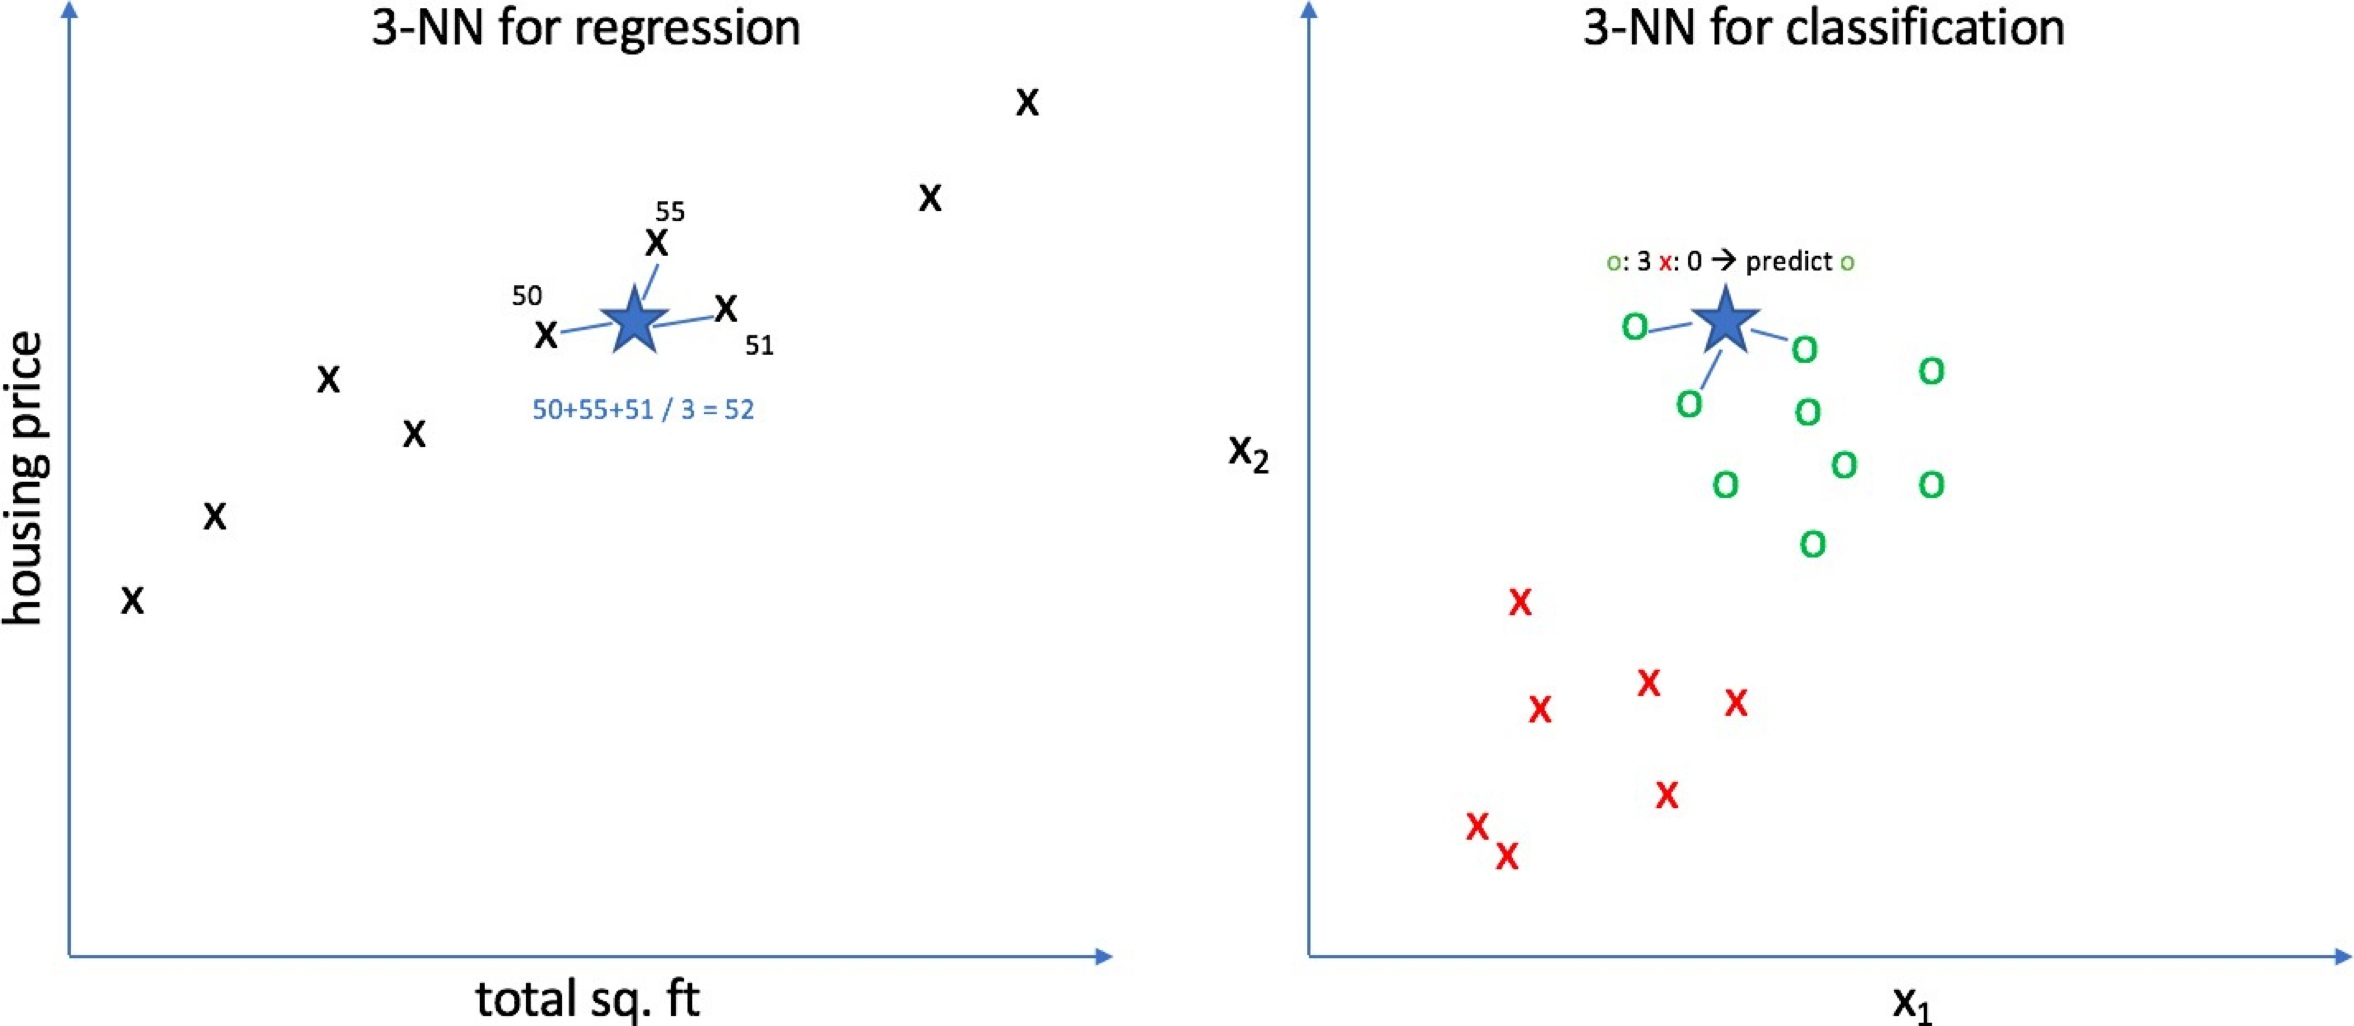

При использовании алгоритма `k Ближайших Соседей` "обучения" как такого не происходит, единственное, что вам нужно сделать -- это запомнить расположения точек в прострастве и их таргетов. При предсказаниях, мы будем присваивать, например, среднее значение $k$ его ближайших соседей.

А какие вы можете назвать примеры неоднородных пространств? Почему вы считаете, что они неоднородны?

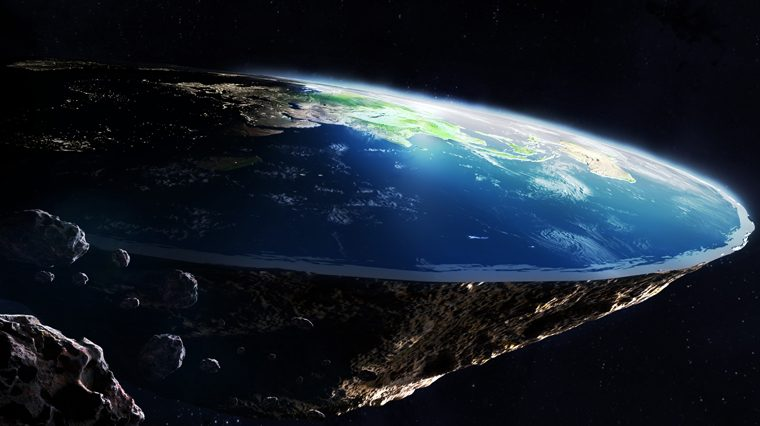

##### Реализация kNN в библиотеки sklearn

Главный настраиваемый параметр алгоритма -- это конечно число соседей (`k`). Часто этот параметр имеет оптимальное значение, то есть такое значение, что все меньше него и больше него будут давать результат хуже.

Полный список параметров вы можете посмотреть на [странице библиотеки](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Создадим экземпляр класса KNeighborsRegressor с числом ближайших соседей (n_neighbors) равным 3
model_knn = KNeighborsRegressor(n_neighbors=3)

# Обучим модель
model_knn.fit(X_train, y_train)

# Сделаем предсказание на тестовой выборке
y_pred = model_knn.predict(X_test)

In [ ]:
y_pred

array([20299.66666667, 21806.66666667,  8546.33333333, 12168.33333333,
       31358.33333333,  7382.33333333,  8332.        ,  7560.66666667,
        9379.66666667,  7232.66666667, 16519.33333333,  7726.33333333,
       13681.        , 10364.66666667, 37516.66666667,  6261.66666667,
        5596.33333333, 14076.        ,  8136.33333333,  9113.        ,
       10695.        , 14979.66666667,  7382.33333333,  5546.        ,
        6990.        , 22343.        ,  9894.33333333, 18661.66666667,
        7382.33333333, 17250.        , 20845.        ,  6370.        ,
        7232.66666667, 19770.        ,  8157.33333333, 20845.        ,
        9894.33333333, 13711.66666667,  7721.66666667, 15957.33333333,
        7232.66666667])

У нас получилась хорошая модель или плохая?

##### Качество выбранного решения

В задачах регрессии часто оценивают качество выбранного решения по тому, насколько алгоритм ошибается на отложенных данных, так например часто смотрят на (здесь $\widetilde{y}$ -- предсказанное значение, $y$ -- реальное значение):

* Mean Square Error (MSE): $\frac{1}{n}\sum\limits_i^n(\widetilde{y}_i - y_i)^2$
* Mean Absolute Error (MAE): $\frac{1}{n}\sum\limits_i^n|\widetilde{y}_i - y_i|$
* Max Error: $\max\limits_i |\widetilde{y}_i - y_i|$

Давайте мы порисуем эти метрики в самом простом случае:



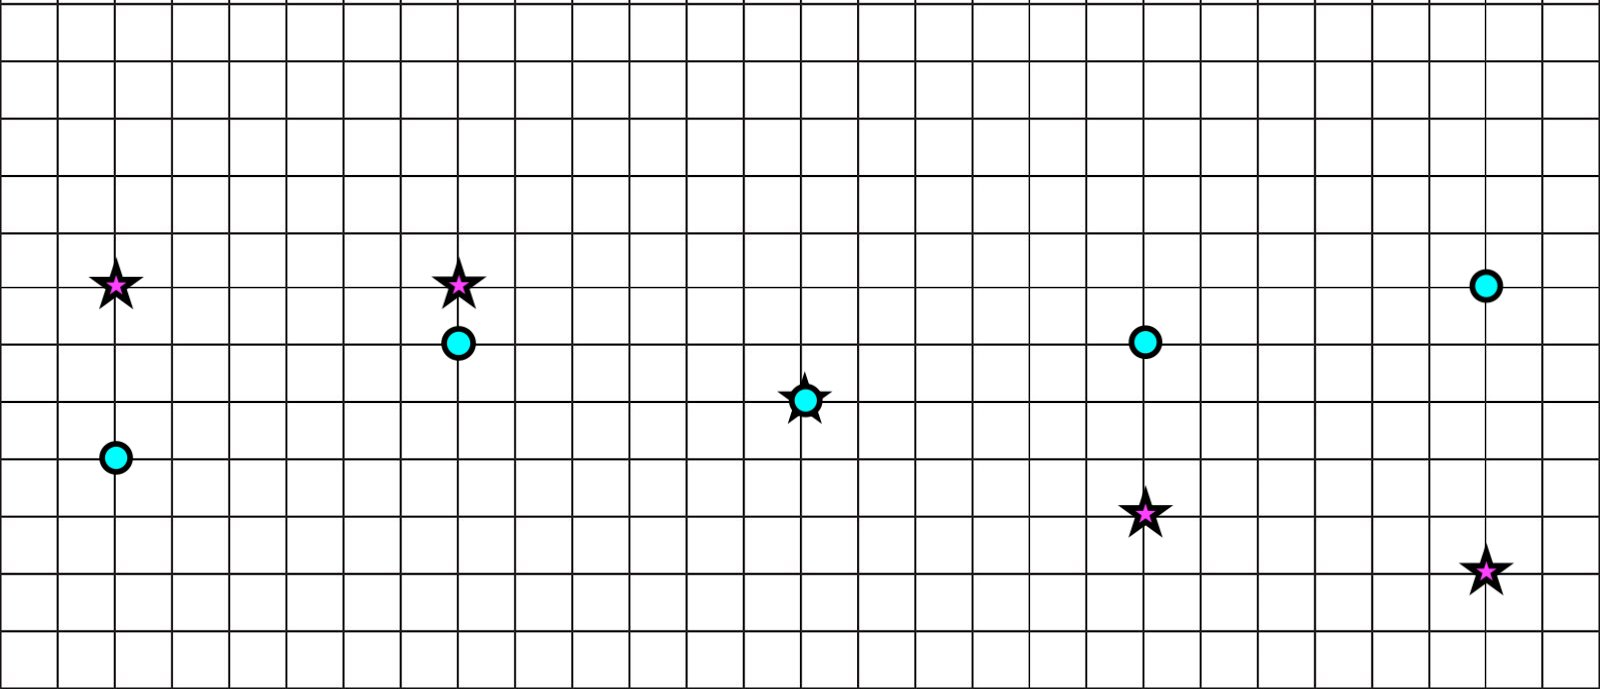

In [ ]:
# Тут давайте напишем функции ошибок (можно обычные, можно lambda-функции)
import numpy as np


real = np.array([4, 6, 5, 6, 7])
pred = np.array([7, 7, 5, 3, 2])

MSE = lambda y1, y2: np.mean((y1 - y2) ** 2)
MAE = lambda y1, y2: np.mean(np.abs(y1 - y2))
MAX_ERROR = lambda y1, y2: np.max(np.abs(y1 - y2))

In [ ]:
# def MSE(y1, y2):
#   return ...

In [ ]:
print('MSE = ', MSE(real, pred))
print('MAE = ', MAE(real, pred))
print('MAX_ERROR = ', MAX_ERROR(real, pred))

MSE =  8.8
MAE =  2.4
MAX_ERROR =  5


##### Реализация метрик качества в sklearn

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

# Эти функции ошибки реализованы в модуле metrics библиотеки sklearn -- давайте ими воспользуемся
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ",  mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))

MSE:  3578517.7118055564
MAE:  1289.8020833333333
MAX_ERROR:  7808.666666666668


In [ ]:
y_pred

array([21008.66666667, 16513.        , 10864.        ,  8780.33333333,
       13020.        , 11621.66666667,  9749.33333333,  6383.33333333,
        7763.        ,  8746.33333333,  5546.        ,  6058.        ,
        6383.33333333,  7865.66666667,  6984.33333333, 14066.66666667,
       10714.33333333,  7763.        , 19059.33333333,  6383.33333333,
       17628.33333333, 13909.66666667,  5514.33333333,  5848.66666667,
       11301.33333333,  7907.33333333, 19059.33333333,  8780.33333333,
        7763.        , 15316.        , 10061.33333333, 16799.        ])

#### Поговорим о линейной регрессии

**Линейная регрессия** является второй по популярности моделью машинного обучения (часто, когда в СМИ пишут "искуственный интеллект", на самом деле оказывается простой линейной моделью). Эта модель старается аппроксимировать данные прямой (даже если это невозможно).

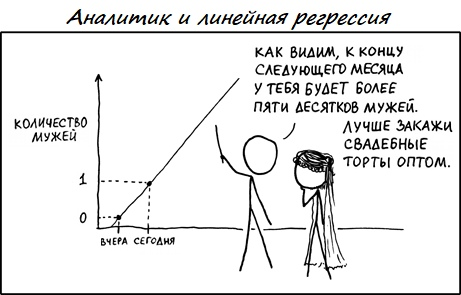

##### Постановка задачи и построение решения

У нас есть данные, которые записаны в виде матрицы размера  $M\times N$ , где $M$ число объектов, а $N$ -- число признаков. Кроме того, у нас есть столбец таргета $Y$.

Мы хотим построить прямую (в общем случае гиперплоскость), которая бы наилучшим образом приближала наши данные в каждой из точек(для каждого объекта).

Например мы можем рассматривать в качестве приближения объекта прямой $(\widetilde{y}_i - y_i)^2$. Чем меньше это значение, тем лучше прямая приближает объект. Если мы хотим приблидать несколько объектов, то можно использовать $\sum\limits_i^n(\widetilde{y}_i - y_i)^2$.


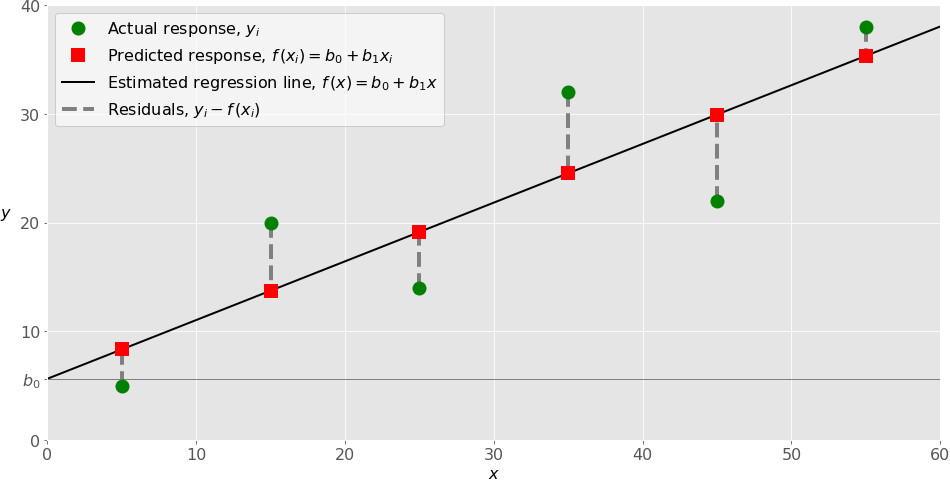

С тем, что мы бы хотели сделать с прямой, мы разобрались, но давайте поговрим о самой прямой(гиперплоскости в общем случае).
Из школы мы помним, что прямую можно задать уравнением $y = kx + b$ и тогда нам нужно определить параметры $k$ и $b$ для нашей "лучшей прямой". В случае, если у нас не прямая, а гиперплоскость, это уравнение переписывается как:
$$y = \sum_i w_i x_i + w_0 = \langle \hat{w}, x \rangle$$
Здесь $x$ -- это строка матрицы объект-признаки, которую мы определили в самом начале, $w$ -- называют вектором весов, а $w_0$ свободным членом.

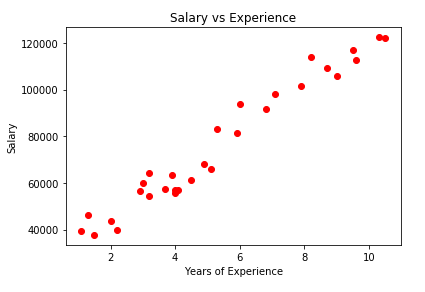

Мы обсудили интуицию по которой находится "идеальная линия", но точное ее нахождение мы обсудим на одном из следующих семинаров, а сейчас перейдем к реализации модели в sklearn.

##### Реализация линейной регрессии в библиотеки sklearn

У классической линейной регрессии нет настраиваемых параметров. Однако они есть у более продвинутых версий, о которых мы поговорим на следующем занятии.

Но технические параметры можно посмотреть на [странице библиотеки](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [ ]:
from sklearn.linear_model import LinearRegression

# Создадим экземпляр класса LinearRegression без параметров
model_lr = LinearRegression()

# Обучим модель
model_lr.fit(X_train, y_train)

# Сделаем предсказание на тестовой выборке
y_pred = model_lr.predict(X_test)

##### Еще способы измерить качество решения

Если оценивать качество с точки зрения ошибки, то становится трудно понять какие изменение в ошибки существенно и насколько это влияет на картину мира, поэтому были придуманы другие способы измерять качество работы регрессии:

* Coefficient of determination ($R^2$): $1 - \frac{\sigma_{\widetilde{y} - y}^2}{\sigma_y^2} \in (-∞, 1)$
* Mean Absolute Percentage Error (MAPE): $100 \cdot \frac{1}{n}\sum\limits_i^n\left|\frac{y_i - \widetilde{y}_i}{y_i}\right| \in [0, +∞)$

Какие значения этих метрик будут у наилучшей модели? Чем эти петрики лучше предыдущих?

Посмотрим на эти метрики на том же примере:

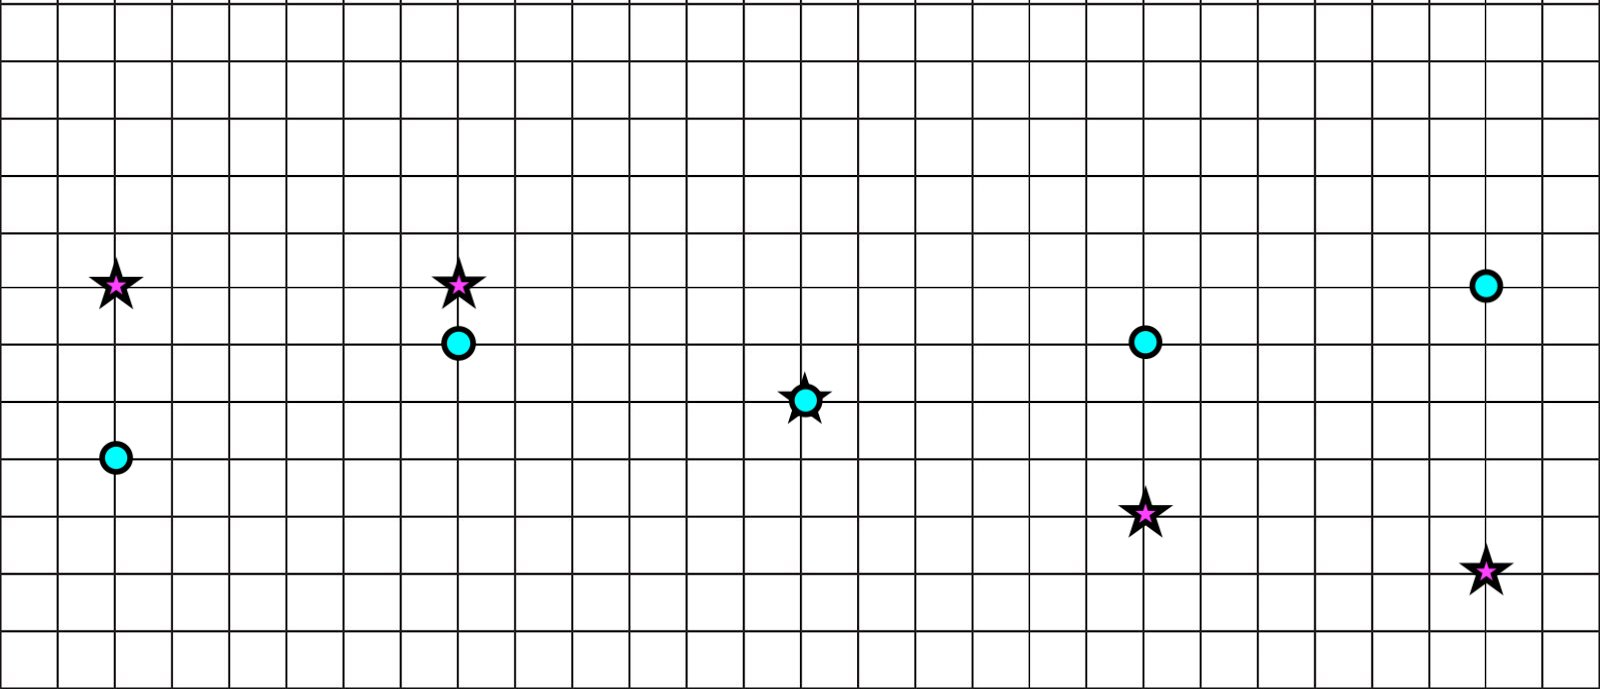

In [ ]:
real = np.array([4, 6, 5, 6, 7])
pred = np.array([7, 7, 5, 3, 2])

##### Реализация еще одних метрик качества в sklearn

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Эти функции ошибки реализованы в модуле metrics библиотеки sklearn -- давайте ими воспользуемся
print("R2: ", r2_score(real, pred))
print("MAPE: ", mean_absolute_percentage_error(real, pred))

R2:  -7.4615384615384635
MAPE:  0.4261904761904762


In [ ]:
# Давайте сравним метрики KNN и Линейной регрессии

y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

print("MSE (KNN | LR): ", mean_squared_error(y_test, y_pred_knn), " | ", mean_squared_error(y_test, y_pred_lr))
print("MAE (KNN | LR): ", mean_absolute_error(y_test, y_pred_knn), " | ", mean_absolute_error(y_test, y_pred_lr))
print("MAX_ERROR (KNN | LR): ", max_error(y_test, y_pred_knn), " | ", max_error(y_test, y_pred_lr))

print("R2 (KNN | LR): ", r2_score(y_test, y_pred_knn), " | ", r2_score(y_test, y_pred_lr))
print("MAPE (KNN | LR): ", mean_absolute_percentage_error(y_test, y_pred_knn), " | ", mean_absolute_percentage_error(y_test, y_pred_lr))

MSE (KNN | LR):  19926880.336043358  |  13440043.044398662
MAE (KNN | LR):  2541.5934959349593  |  2341.7698489019813
MAX_ERROR (KNN | LR):  18972.0  |  14001.763371239838
R2 (KNN | LR):  0.7459712661734021  |  0.8286657489999525
MAPE (KNN | LR):  0.15999025689238555  |  0.22601224145345636


Получив метрики для baseline решения, можно окинуть взлядом проделанную работу  и подумать, что можно было бы улучшить:

1. Подходят ли наши данные под требования в метрических алгоритмах?
2. Правильно ли было все категориальные признаки кодировать OHE?
3. Не слишком ли много получилось признаков на такое небольшое число данных?
4. Стоило ли выкидывать строки с пропусками? Как мы можем их обработать?
5. Как можно использовать поле `make`?

Давайте и займемся этими улучшениями! Как насчет править прям бейзлайн решение? Надо только сохранить посчитанные метрики, чтобы убедиться, что мы не сделали хуже:)

In [ ]:
df.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.0,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,0.905660,0.169811,3.194969,0.0,98.264151,172.413836,65.607547,53.899371,...,0.289308,0.031447,0.352201,0.496855,0.106918,0.396226,0.094340,0.006289,0.402516,0.031447
std,1.193086,35.651285,0.293224,0.376653,0.983908,0.0,5.167416,11.523177,1.947883,2.268761,...,0.454874,0.175073,0.479165,0.501570,0.309986,0.490658,0.293224,0.079305,0.491954,0.175073
min,-2.000000,65.000000,0.000000,0.000000,2.000000,0.0,86.600000,141.100000,60.300000,49.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,1.000000,0.000000,2.000000,0.0,94.500000,165.650000,64.000000,52.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,113.000000,1.000000,0.000000,4.000000,0.0,96.900000,172.400000,65.400000,54.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,148.000000,1.000000,0.000000,4.000000,0.0,100.800000,177.800000,66.500000,55.500000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,256.000000,1.000000,1.000000,4.000000,0.0,115.600000,202.600000,71.700000,59.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_lr = LinearRegression()

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
print("MSE (KNN | LR): ", mean_squared_error(y_test, y_pred_knn), " | ", mean_squared_error(y_test, y_pred_lr))
print("MAE (KNN | LR): ", mean_absolute_error(y_test, y_pred_knn), " | ", mean_absolute_error(y_test, y_pred_lr))
print("MAX_ERROR (KNN | LR): ", max_error(y_test, y_pred_knn), " | ", max_error(y_test, y_pred_lr))

print("R2 (KNN | LR): ", r2_score(y_test, y_pred_knn), " | ", r2_score(y_test, y_pred_lr))
print("MAPE (KNN | LR): ", mean_absolute_percentage_error(y_test, y_pred_knn), " | ", mean_absolute_percentage_error(y_test, y_pred_lr))

MSE (KNN | LR):  19935600.44444444  |  15366059.440005448
MAE (KNN | LR):  2553.1382113821137  |  2522.4921740770133
MAX_ERROR (KNN | LR):  18972.0  |  14384.963499658494
R2 (KNN | LR):  0.7458601018537194  |  0.8041128085469359
MAPE (KNN | LR):  0.1618436387268942  |  0.241172944828468


#### Выводы

Сегодня мы познакомились с постановкой задачи регрессии, разобрались какие данные являются размеченными и какие метки говорят о том, что это задача регрессии.
Мы узнали о двух моделях машинного обучения, которые решают задачи регрессии, а также поговорили о метриках качества, которые используются для проверки полученного решения в задачах такого типа.